# <center>Kiss Dániel Márk</center>
## <center>WP871Q</center>

# Library import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Data import

In [2]:
df_verseny_public_train = pd.read_csv('data/verseny_public_train.csv', sep=',', low_memory=False)

# Data familirsation

# Feature importance

## Decision Tree

Feature ranking:
1. Feature 59 (0.036113) Topic42_ec
2. Feature 17 (0.032716) Topic12_ec
3. Feature 82 (0.030206) Topic63_ic
4. Feature 7 (0.028687) Topic4_ec
5. Feature 68 (0.026232) Topic55_ic
6. Feature 66 (0.023511) Topic54_ic
7. Feature 6 (0.021837) Topic4_ic
8. Feature 16 (0.021674) Topic12_ic
9. Feature 21 (0.020643) Topic14_ec
10. Feature 83 (0.020181) Topic63_ec
11. Feature 61 (0.020055) Topic51_ec
12. Feature 70 (0.018291) Topic56_ic
13. Feature 29 (0.018267) Topic19_ec
14. Feature 19 (0.017367) Topic13_ec
15. Feature 20 (0.016332) Topic14_ic
16. Feature 28 (0.015586) Topic19_ic
17. Feature 18 (0.014909) Topic13_ic
18. Feature 63 (0.014276) Topic52_ec
19. Feature 69 (0.013676) Topic55_ec
20. Feature 9 (0.013169) Topic5_ec
21. Feature 4 (0.012771) Topic3_ic
22. Feature 22 (0.012592) Topic15_ic
23. Feature 135 (0.012307) Topic99_ec
24. Feature 71 (0.012051) Topic56_ec
25. Feature 35 (0.011881) Topic24_ec
26. Feature 12 (0.011826) Topic9_ic
27. Feature 3 (0.011619) Topic2_ec
28.

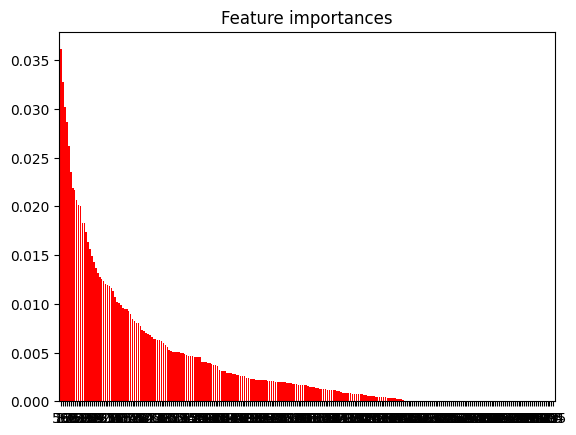

In [3]:
X = df_verseny_public_train.drop(['target', 'cookie_id'], axis=1)
y = df_verseny_public_train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], X.columns[indices[f]]))


plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Random forest

Feature ranking:
1. Feature 7 (0.024967) Topic4_ec
2. Feature 68 (0.023630) Topic55_ic
3. Feature 17 (0.023451) Topic12_ec
4. Feature 82 (0.022785) Topic63_ic
5. Feature 19 (0.022069) Topic13_ec
6. Feature 21 (0.021928) Topic14_ec
7. Feature 16 (0.021423) Topic12_ic
8. Feature 18 (0.020803) Topic13_ic
9. Feature 6 (0.020710) Topic4_ic
10. Feature 83 (0.020597) Topic63_ec
11. Feature 20 (0.020068) Topic14_ic
12. Feature 71 (0.019699) Topic56_ec
13. Feature 70 (0.019575) Topic56_ic
14. Feature 59 (0.019058) Topic42_ec
15. Feature 66 (0.016688) Topic54_ic
16. Feature 4 (0.016477) Topic3_ic
17. Feature 69 (0.016437) Topic55_ec
18. Feature 67 (0.015949) Topic54_ec
19. Feature 61 (0.015461) Topic51_ec
20. Feature 29 (0.014567) Topic19_ec
21. Feature 28 (0.014185) Topic19_ic
22. Feature 12 (0.011855) Topic9_ic
23. Feature 1 (0.011782) Topic1_ec
24. Feature 35 (0.011640) Topic24_ec
25. Feature 22 (0.011488) Topic15_ic
26. Feature 87 (0.011218) Topic65_ec
27. Feature 105 (0.011048) Topic74_ec
2

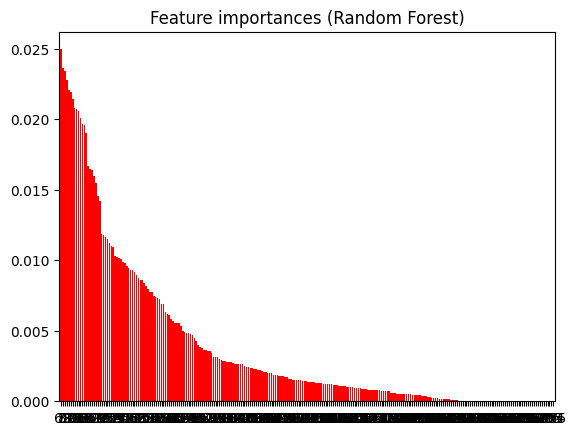

In [4]:
clf_rf = RandomForestClassifier()

clf_rf.fit(X_train, y_train)


importances_rf = clf_rf.feature_importances_


indices_rf = np.argsort(importances_rf)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f) %s" % (f + 1, indices_rf[f], importances_rf[indices_rf[f]], X.columns[indices_rf[f]]))

plt.figure()
plt.title("Feature importances (Random Forest)")
plt.bar(range(X.shape[1]), importances_rf[indices_rf],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices_rf)
plt.xlim([-1, X.shape[1]])
plt.show()

In [5]:
# Create DataFrames for feature importances
dt_feature_importances = pd.DataFrame({'Feature': indices, 'Importance_DT': importances[indices]})
rf_feature_importances = pd.DataFrame({'Feature': indices_rf, 'Importance_RF': importances_rf[indices_rf]})

# Merge DataFrames on the 'Feature' column
merged_feature_importances = pd.merge(dt_feature_importances, rf_feature_importances, on='Feature')

print("Merged Feature Importances:")
print(merged_feature_importances)

Merged Feature Importances:
     Feature  Importance_DT  Importance_RF
0         59       0.036113       0.019058
1         17       0.032716       0.023451
2         82       0.030206       0.022785
3          7       0.028687       0.024967
4         68       0.026232       0.023630
..       ...            ...            ...
251      208       0.000000       0.000011
252      207       0.000000       0.000178
253      205       0.000000       0.000144
254      204       0.000000       0.000163
255      255       0.000000       0.000000

[256 rows x 3 columns]


In [6]:
percentile_threshold = 0.8

importance_threshold_dt = merged_feature_importances['Importance_DT'].quantile(percentile_threshold)
importance_threshold_rf = merged_feature_importances['Importance_RF'].quantile(percentile_threshold)

print("Threshold value based on the top", int(percentile_threshold * 100), "percentileDT:", importance_threshold_dt, "percentileRF:", importance_threshold_rf)


Threshold value based on the top 80 percentileDT: 0.006241050085200613 percentileRF: 0.007265267869115668


In [7]:
merged_feature_importances = merged_feature_importances[(merged_feature_importances['Importance_DT'] > importance_threshold_dt) & (merged_feature_importances['Importance_RF'] > importance_threshold_rf)]
print("Merged Feature Importances:")
print(merged_feature_importances)

Merged Feature Importances:
    Feature  Importance_DT  Importance_RF
0        59       0.036113       0.019058
1        17       0.032716       0.023451
2        82       0.030206       0.022785
3         7       0.028687       0.024967
4        68       0.026232       0.023630
5        66       0.023511       0.016688
6         6       0.021837       0.020710
7        16       0.021674       0.021423
8        21       0.020643       0.021928
9        83       0.020181       0.020597
10       61       0.020055       0.015461
11       70       0.018291       0.019575
12       29       0.018267       0.014567
13       19       0.017367       0.022069
14       20       0.016332       0.020068
15       28       0.015586       0.014185
16       18       0.014909       0.020803
17       63       0.014276       0.010256
18       69       0.013676       0.016437
19        9       0.013169       0.010189
20        4       0.012771       0.016477
21       22       0.012592       0.011488
22    

In [8]:
X = X.drop(X.columns.difference(X.columns[merged_feature_importances['Feature']]), axis=1)


In [9]:
len(X.columns)

45

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell building

In [11]:
"""tree_clf = DecisionTreeClassifier()
knn_clf = KNeighborsClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators=[('dt', tree_clf), ('knn', knn_clf), ('svc', svm_clf)],
    voting='hard') # or soft voting, should try both

voting_clf.fit(X_train,y_train)

for clf in (tree_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

y_pred = voting_clf.predict(X_test)

print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))"""

'tree_clf = DecisionTreeClassifier()\nknn_clf = KNeighborsClassifier()\nsvm_clf = SVC(probability=True)\n\nvoting_clf = VotingClassifier(\n    estimators=[(\'dt\', tree_clf), (\'knn\', knn_clf), (\'svc\', svm_clf)],\n    voting=\'hard\') # or soft voting, should try both\n\nvoting_clf.fit(X_train,y_train)\n\nfor clf in (tree_clf, knn_clf, svm_clf, voting_clf):\n    clf.fit(X_train, y_train)\n    y_pred = clf.predict(X_test)\n    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))\n\ny_pred = voting_clf.predict(X_test)\n\nprint("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))'

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize base classifiers
tree_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)  # Use Random Forest with 100 trees and parallel processing
knn_clf = KNeighborsClassifier(n_jobs=-1)
svm_clf = SVC(probability=True)

# Create a voting classifier
voting_clf = VotingClassifier(
    estimators=[('tree', tree_clf), ('knn', knn_clf), ('svm', svm_clf)],
    voting='soft'
)

In [13]:
# Train the voting classifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('tree', RandomForestClassifier(n_jobs=-1)),
                             ('knn', KNeighborsClassifier(n_jobs=-1)),
                             ('svm', SVC(probability=True))],
                 voting='soft')

In [14]:
"""for clf in (tree_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))"""

'for clf in (tree_clf, knn_clf, svm_clf, voting_clf):\n    clf.fit(X_train, y_train)\n    y_pred = clf.predict(X_test)\n    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))'

In [15]:
# Make predictions
y_pred = voting_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Voting Classifier Accuracy:", accuracy)

Voting Classifier Accuracy: 0.9852


In [16]:
#save the model

import pickle

filename = 'voting_clf_model_soft.sav'

pickle.dump(voting_clf, open(filename, 'wb'))

In [17]:
#load the model

loaded_model = pickle.load(open(filename , 'rb'))


# Test set

In [18]:
df_verseny_public_test = pd.read_csv('data/verseny_public_test.csv', sep=',', low_memory=False)

In [19]:
#prediction output like this
"""cookie_id,P1
300000,0.006936655528409391
300001,0.00527454177592661
300002,0.011525348288803432
300003,0.005810514691014177
300004,0.033702118420699805
300005,0.00527454177592661
300006,0.00527454177592661"""

X_test = df_verseny_public_test.drop(['cookie_id'], axis=1)

X_test = X_test.drop(X_test.columns.difference(X.columns), axis=1)

# target value should be a probability score between 0 and 1

y_pred = voting_clf.predict_proba(X_test)[:, 1]

df_verseny_public_test['target'] = y_pred

df_verseny_public_test = df_verseny_public_test[['cookie_id', 'target']]

df_verseny_public_test.to_csv('data/verseny_public_test_prediction_ensemble_classifier_soft.csv', index=False)